In [133]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
data_path = "cardata.csv"

In [135]:
data = pd.read_csv(data_path)

In [136]:
df = pd.DataFrame(data)
df

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0  
2        Dealer       Manual      0  
3        Dealer       Manual      0  
4        Dealer       Manual      0  
..          ...          ...    ...  
296      Dealer       Manual      0  
297      Dealer       Manual      0  
298      Dealer       Manual      0  
299      Dealer       Manual      0  
300      Dealer       Manual      0  

[301 rows x 9 columns]

In [137]:
df.describe(include="all")

Car_Name         Year  Selling_Price  Present_Price     Kms_Driven  \
count       301   301.000000     301.000000     301.000000     301.000000   
unique       98          NaN            NaN            NaN            NaN   
top        city          NaN            NaN            NaN            NaN   
freq         26          NaN            NaN            NaN            NaN   
mean        NaN  2013.627907       4.661296       7.628472   36947.205980   
std         NaN     2.891554       5.082812       8.644115   38886.883882   
min         NaN  2003.000000       0.100000       0.320000     500.000000   
25%         NaN  2012.000000       0.900000       1.200000   15000.000000   
50%         NaN  2014.000000       3.600000       6.400000   32000.000000   
75%         NaN  2016.000000       6.000000       9.900000   48767.000000   
max         NaN  2018.000000      35.000000      92.600000  500000.000000   

       Fuel_Type Seller_Type Transmission       Owner  
count        301         301          301  301.000000  
unique         3           2            2         NaN  
top       Petrol      Dealer       Manual         NaN  
freq         239         195          261         NaN  
mean         NaN         NaN          NaN    0.043189  
std          NaN         NaN          NaN    0.247915  
min          NaN         NaN          NaN    0.000000  
25%          NaN         NaN          NaN    0.000000  
50%          NaN         NaN          NaN    0.000000  
75%          NaN         NaN          NaN    0.000000  
max          NaN         NaN          NaN    3.000000

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [139]:
df['Age'] = np.abs(df['Year'] - max(df['Year']))
df = df.drop(columns=['Car_Name', 'Year'])
df

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0             3.35           5.59       27000    Petrol      Dealer   
1             4.75           9.54       43000    Diesel      Dealer   
2             7.25           9.85        6900    Petrol      Dealer   
3             2.85           4.15        5200    Petrol      Dealer   
4             4.60           6.87       42450    Diesel      Dealer   
..             ...            ...         ...       ...         ...   
296           9.50          11.60       33988    Diesel      Dealer   
297           4.00           5.90       60000    Petrol      Dealer   
298           3.35          11.00       87934    Petrol      Dealer   
299          11.50          12.50        9000    Diesel      Dealer   
300           5.30           5.90        5464    Petrol      Dealer   

    Transmission  Owner  Age  
0         Manual      0    4  
1         Manual      0    5  
2         Manual      0    1  
3         Manual      0    7  
4         Manual      0    4  
..           ...    ...  ...  
296       Manual      0    2  
297       Manual      0    3  
298       Manual      0    9  
299       Manual      0    1  
300       Manual      0    2  

[301 rows x 8 columns]

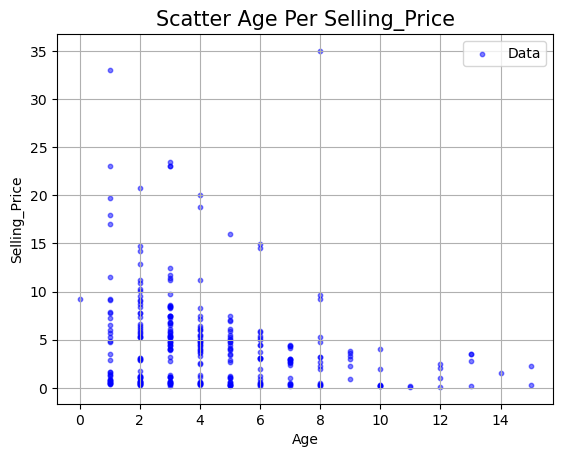

In [140]:
plt.scatter(df.Age, df.Selling_Price, s=10, c='b', alpha=.5, label='Data')
plt.title("Scatter Age Per Selling_Price", fontsize=15)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()
plt.show()

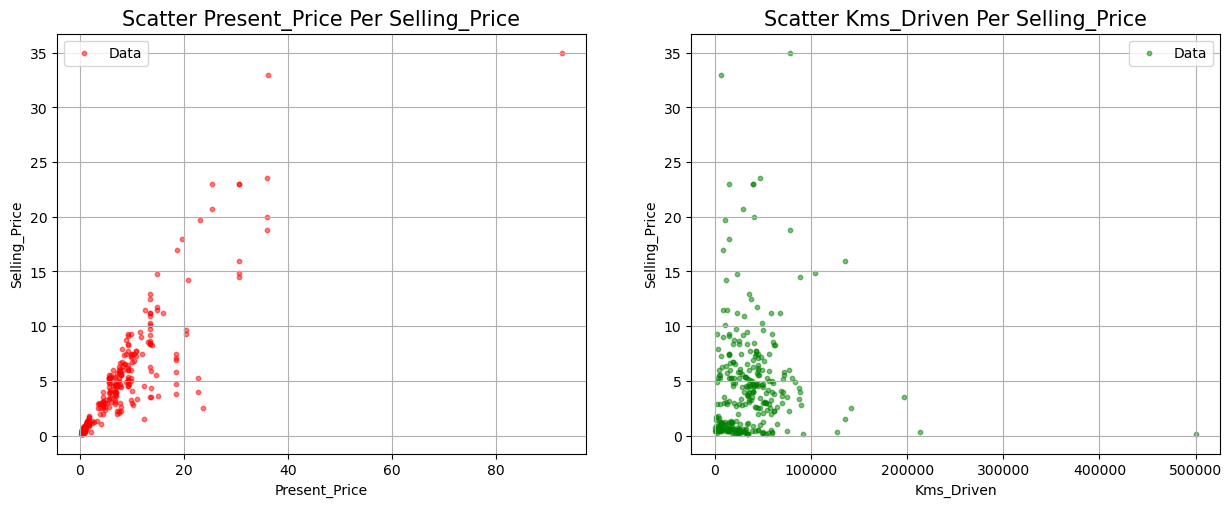

In [141]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.scatter(df.Present_Price, df.Selling_Price, s=10, c='r', alpha=.5, label='Data')
plt.title("Scatter Present_Price Per Selling_Price", fontsize=15)
plt.xlabel("Present_Price", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()


plt.subplot(2, 2, 2)
plt.scatter(df.Kms_Driven, df.Selling_Price, s=10, c='g', alpha=.5, label='Data')
plt.title("Scatter Kms_Driven Per Selling_Price", fontsize=15)
plt.xlabel("Kms_Driven", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()

plt.show()

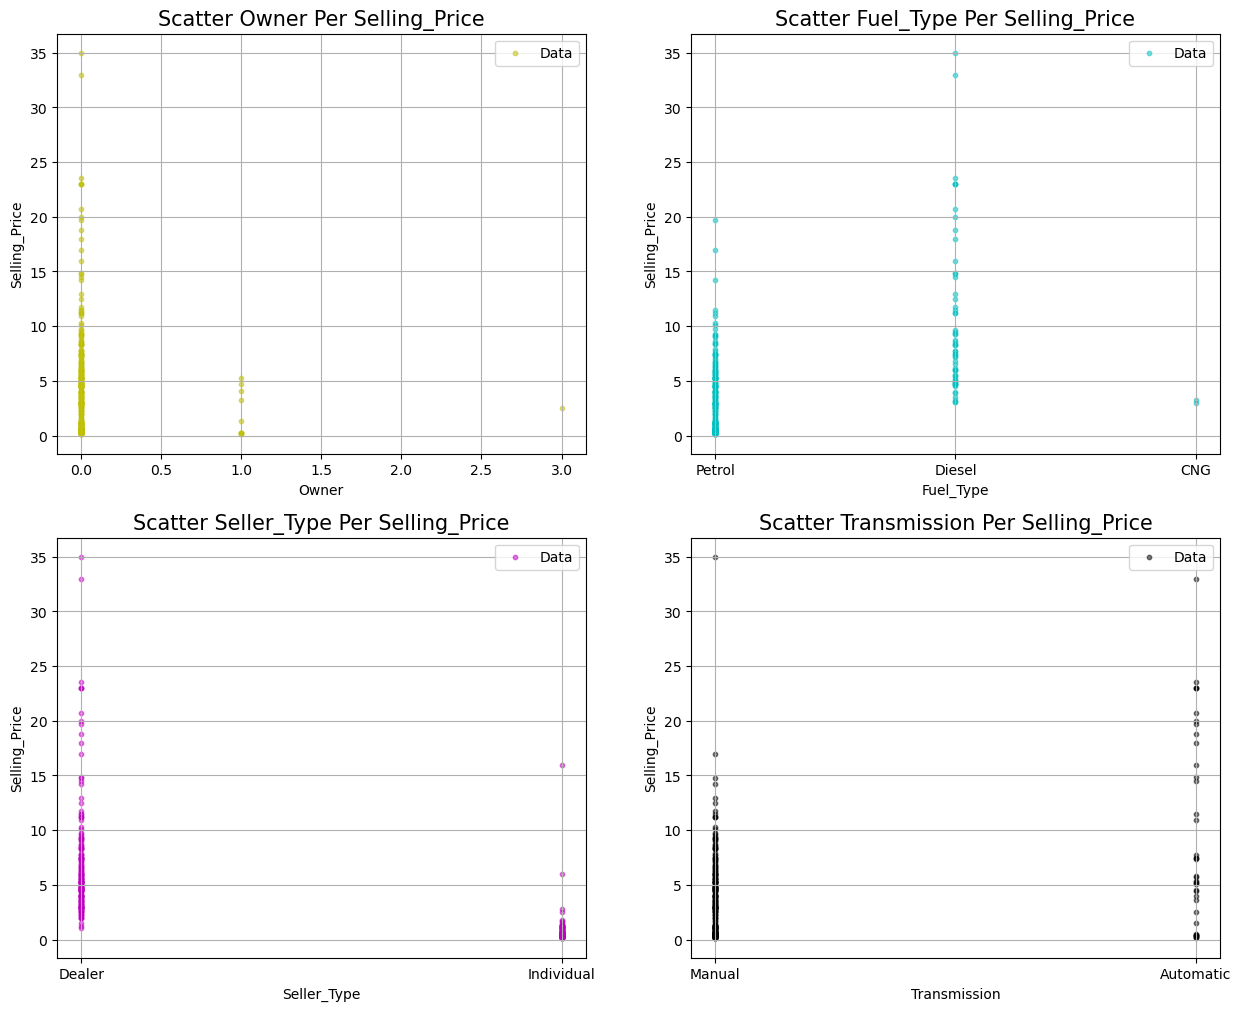

In [142]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.scatter(df.Owner, df.Selling_Price, s=10, c='y', alpha=.5, label='Data')
plt.title("Scatter Owner Per Selling_Price", fontsize=15)
plt.xlabel("Owner", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.scatter(df.Fuel_Type, df.Selling_Price, s=10, c='c', alpha=.5, label='Data')
plt.title("Scatter Fuel_Type Per Selling_Price", fontsize=15)
plt.xlabel("Fuel_Type", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
plt.scatter(df.Seller_Type, df.Selling_Price, s=10, c='m', alpha=.5, label='Data')
plt.title("Scatter Seller_Type Per Selling_Price", fontsize=15)
plt.xlabel("Seller_Type", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.scatter(df.Transmission, df.Selling_Price, s=10, c='k', alpha=.5, label='Data')
plt.title("Scatter Transmission Per Selling_Price", fontsize=15)
plt.xlabel("Transmission", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()

plt.show()

CNG         2
Diesel     60
Petrol    239
Name: Fuel_Type, dtype: int64
########################################################################################################
Individual    106
Dealer        195
Name: Seller_Type, dtype: int64
########################################################################################################
Automatic     40
Manual       261
Name: Transmission, dtype: int64
########################################################################################################
3      1
1     10
0    290
Name: Owner, dtype: int64
########################################################################################################


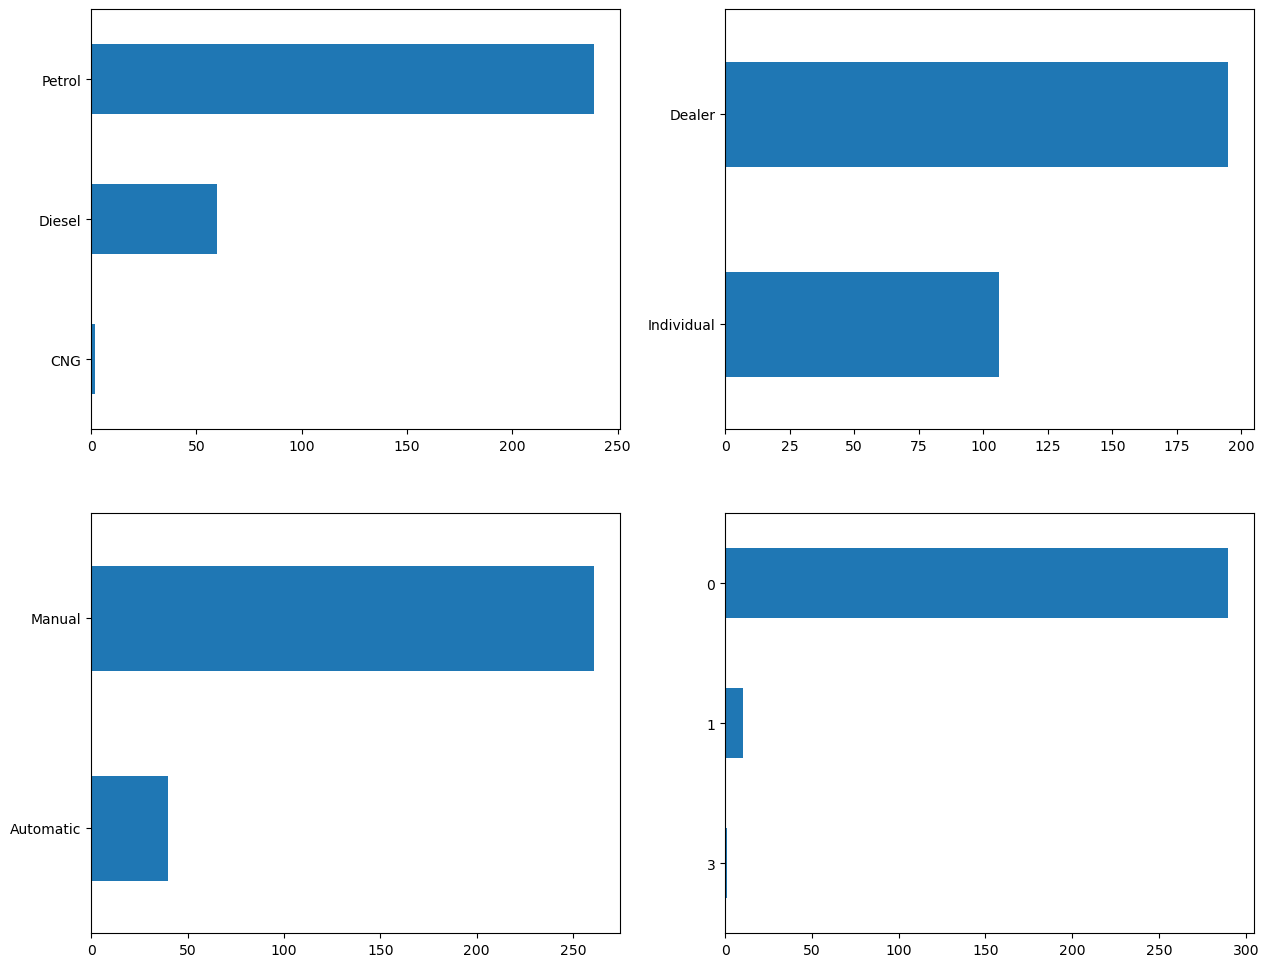

In [143]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
df.Fuel_Type.value_counts().sort_values().plot(kind = 'barh')
print(df.Fuel_Type.value_counts().sort_values())
print('########################################################################################################')

plt.subplot(2, 2, 2)
df.Seller_Type.value_counts().sort_values().plot(kind = 'barh')
print(df.Seller_Type.value_counts().sort_values())
print('########################################################################################################')

plt.subplot(2, 2, 3)
df.Transmission.value_counts().sort_values().plot(kind = 'barh')
print(df.Transmission.value_counts().sort_values())
print('########################################################################################################')

plt.subplot(2, 2, 4)
df.Owner.value_counts().sort_values().plot(kind = 'barh')
print(df.Owner.value_counts().sort_values())
print('########################################################################################################')


Mean Kms_Driven : 
 36947.20598006644
##########################################################################################################
Mean Selling_Price : 
 4.661295681063127
##########################################################################################################


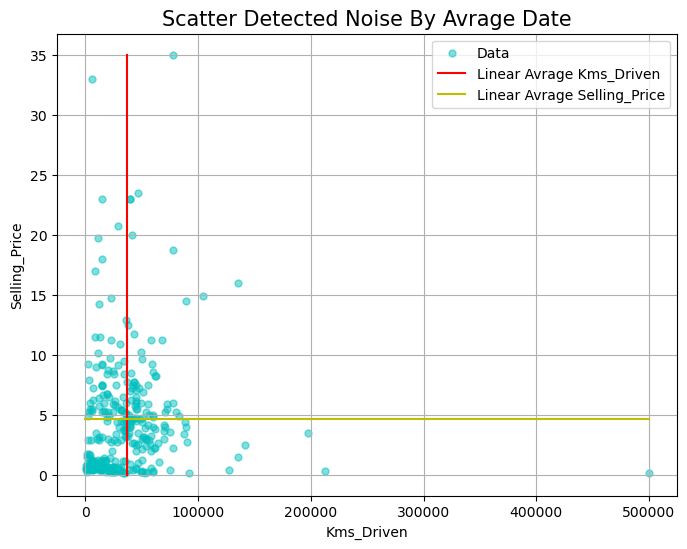

In [144]:
Mean_KD = np.mean (df.Kms_Driven)
Mean_SP = np.mean (df.Selling_Price)
print('Mean Kms_Driven : \n', Mean_KD)
print('##########################################################################################################')
print('Mean Selling_Price : \n', Mean_SP)
print('##########################################################################################################')

plt.figure(figsize=(8,6))
plt.scatter(df.Kms_Driven, df.Selling_Price, s=25, c='c', alpha=.5, label='Data')
plt.plot((Mean_KD , Mean_KD), (0, max(df.Selling_Price)), 'r', label='Linear Avrage Kms_Driven' )
plt.plot((0, max(df.Kms_Driven)), (Mean_SP, Mean_SP), 'y',  label='Linear Avrage Selling_Price' )
plt.title('Scatter Detected Noise By Avrage Date', fontsize=15)
plt.xlabel("Kms_Driven", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()
plt.show()


In [145]:
df_OHE = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
df_OHE

Selling_Price  Present_Price  Kms_Driven  Owner  Age  Fuel_Type_Diesel  \
0             3.35           5.59       27000      0    4                 0   
1             4.75           9.54       43000      0    5                 1   
2             7.25           9.85        6900      0    1                 0   
3             2.85           4.15        5200      0    7                 0   
4             4.60           6.87       42450      0    4                 1   
..             ...            ...         ...    ...  ...               ...   
296           9.50          11.60       33988      0    2                 1   
297           4.00           5.90       60000      0    3                 0   
298           3.35          11.00       87934      0    9                 0   
299          11.50          12.50        9000      0    1                 1   
300           5.30           5.90        5464      0    2                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0                       0                    1  
2                   1                       0                    1  
3                   1                       0                    1  
4                   0                       0                    1  
..                ...                     ...                  ...  
296                 0                       0                    1  
297                 1                       0                    1  
298                 1                       0                    1  
299                 0                       0                    1  
300                 1                       0                    1  

[301 rows x 9 columns]

In [146]:
corr_matrix = df_OHE.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
Age                      -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

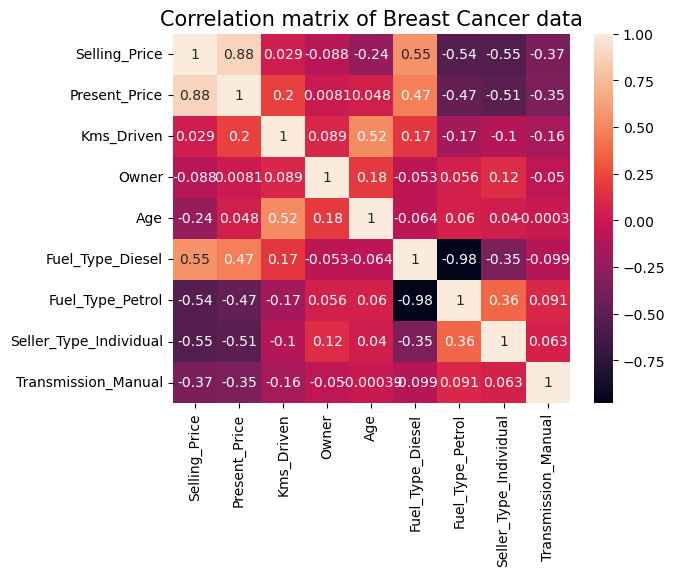

In [147]:
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation matrix of Breast Cancer data", fontsize=15)
plt.show()

In [148]:
def test_size(df):
    test_list = []
    X = df.iloc[:, 1:8]
    Y = df.iloc[:, 0].values.reshape(-1, 1)
    for test in range(1, 6):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(test/10), random_state=0)
        regressor = LinearRegression() 
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        R2_score = metrics.r2_score(y_test, y_pred)*100
        test_list.append(R2_score)
    print('Scores : ')
    print(test_list)
    print("######################################################################################################")
    return test_list


plt.plot(test_size(df_OHE), 'c', label='Evaluation Linear' )
plt.title("Evaluated Test_Size Per Scores", fontsize=15)
plt.xlabel('Test_Size', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(range(0, 5), ['90-10', '80-20', '70-30', '60-40', '50-50'])
plt.legend()
plt.grid()
plt.show()

Scores : 
[85.39548560266311, 90.15733005536532, 83.84775618515269, 83.5806180657553, 83.4693082595764]
######################################################################################################


Fold :  2
[0.83469308 0.70745099]
Mean Fold : 
0.7710720360410845
######################################################################################################
Fold :  3
[0.83662181 0.8222728  0.83639687]
Mean Fold : 
0.8317638258128982
######################################################################################################
Fold :  4
[0.8485813  0.82195528 0.67130777 0.88032198]
Mean Fold : 
0.8055415819163173
######################################################################################################
Fold :  5
[0.9015733  0.79538288 0.84526894 0.78707718 0.86932444]
Mean Fold : 
0.8397253495181619
######################################################################################################
Fold :  6
[0.88274533 0.82464224 0.85329907 0.79942772 0.73079756 0.89303259]
Mean Fold : 
0.8306574181385491
######################################################################################################
Fold :  7
[0.88287911 0.8278298  0.81524749 0

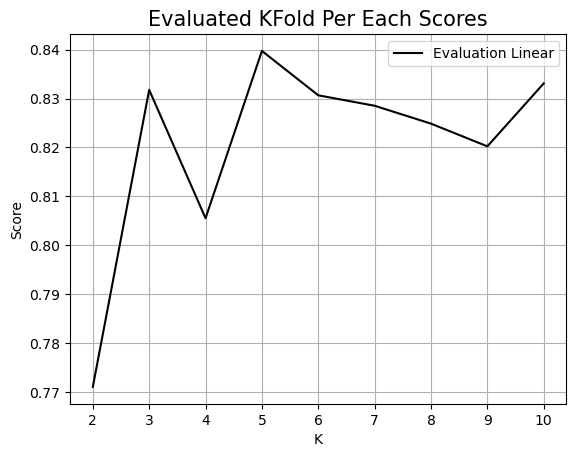

In [149]:
def kfold_valedation(df):
    kfold_list = []
    X = df.iloc[:, 1:8]
    Y = df.iloc[:, 0].values.reshape(-1, 1)
    for k in range (2, 11):
        regressor = LinearRegression()
        kfold_validation = KFold (k, shuffle=True, random_state=0)
        result = cross_val_score(regressor, X, Y , cv=kfold_validation)
        mean = np.mean(result)
        print('Fold : ', str(k))
        print(result)
        print("Mean Fold : ")
        print(mean)
        print('######################################################################################################')
        kfold_list.append(mean)
    return kfold_list
    
    

plt.plot(kfold_valedation(df_OHE), 'k', label='Evaluation Linear' )
plt.title("Evaluated KFold Per Each Scores", fontsize=15)
plt.xlabel('K', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(range(0, 9), [x for x in range(2, 11)])
plt.legend()
plt.grid()
plt.show()

In [150]:
X = df_OHE.iloc[:, 1:8]
Y = df_OHE.iloc[:, 0].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
R2_score = metrics.r2_score(y_test, y_pred)*100
score = regressor.score(x_train, y_train)*100
print('Train_Score :\n', score)
print('Test_Score :\n', R2_score)

Train_Score :
 86.6272833841457
Test_Score :
 90.15733005536532


In [151]:
compale2 = pd.DataFrame({'Actual': y_test.flatten(),
                        'Prediction': y_pred.flatten()})
compale2

Actual  Prediction
0     8.25    7.713431
1     0.50   -0.353287
2     5.25    4.325403
3     9.50    9.203661
4    18.00   13.324614
..     ...         ...
56    0.65    0.405637
57    2.55    2.010929
58    4.15    3.473694
59    1.35    1.184630
60    3.51    3.636268

[61 rows x 2 columns]

In [152]:
print ('Intercept : \n', regressor.intercept_)
print('Coef : \n', regressor.coef_)

Intercept : 
 [2.43340195]
Coef : 
 [[ 4.45918101e-01 -3.73702944e-06 -8.13460657e-01 -4.06842459e-01
   2.53830863e+00  6.63017322e-01 -9.47714842e-01]]


In [153]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(X)
x_poly = pd.DataFrame(x_poly, columns=poly_features.get_feature_names_out(X.columns))
x_poly.shape

(301, 35)

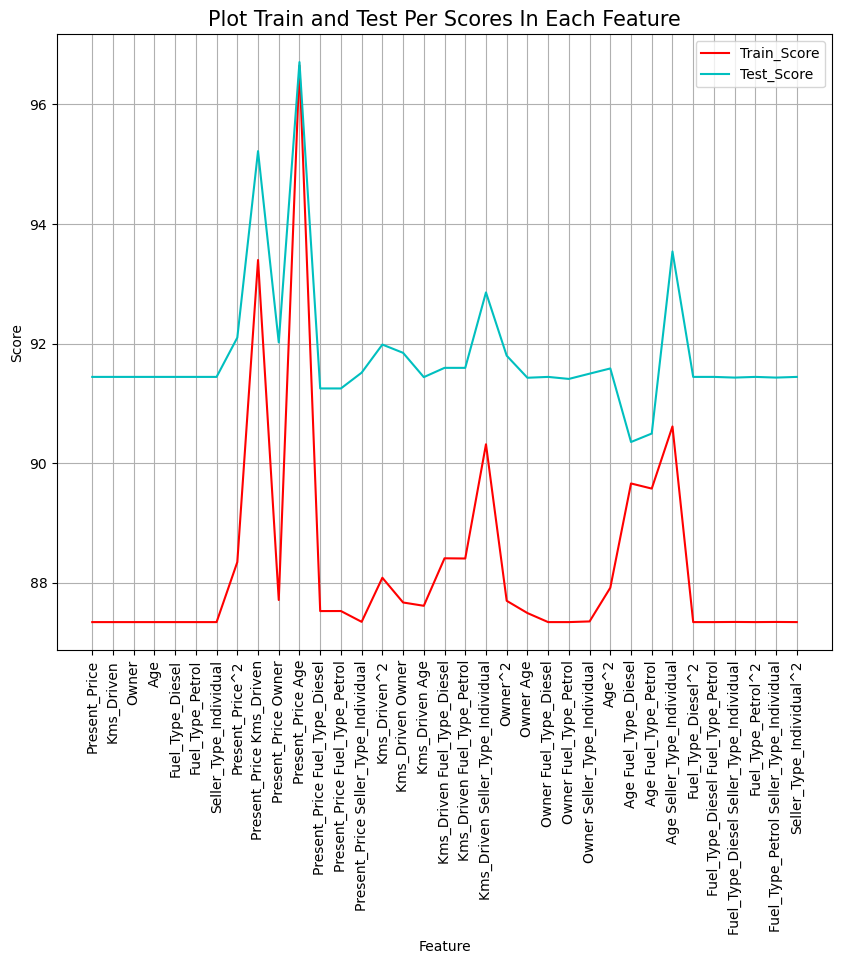

In [154]:
def feature_selection (df, df2):
    
    Train_Score = []
    Test_Score = []
    
    for columns in range (0, 35):    
        df_addfeature = pd.concat([df, df2.iloc[:,columns]], axis=1)
        
        X = df_addfeature.iloc[:, 1:10]
        Y = df_addfeature.iloc[:, 0].values.reshape(-1, 1) 
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression() 
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        R2_score = metrics.r2_score(y_test, y_pred)*100
        score = regressor.score(x_train, y_train)*100
        Train_Score.append(score)
        Test_Score.append(R2_score)
        
    plt.figure(figsize=(10, 8))
    plt.plot(Train_Score, "r", label="Train_Score")
    plt.plot(Test_Score, "c", label="Test_Score")
    plt.title("Plot Train and Test Per Scores In Each Feature", fontsize=15)
    plt.xlabel("Feature")
    plt.ylabel("Score")
    plt.xticks(range(0, 35), [label for label in df2.columns], rotation=90)
    plt.legend()
    plt.grid()
    plt.show()           
        
feature_selection(df_OHE, x_poly)

In [155]:
df_AddFtr = pd.concat([df_OHE, x_poly.iloc[:,10]], axis=1)
df_AddFtr

Selling_Price  Present_Price  Kms_Driven  Owner  Age  Fuel_Type_Diesel  \
0             3.35           5.59       27000      0    4                 0   
1             4.75           9.54       43000      0    5                 1   
2             7.25           9.85        6900      0    1                 0   
3             2.85           4.15        5200      0    7                 0   
4             4.60           6.87       42450      0    4                 1   
..             ...            ...         ...    ...  ...               ...   
296           9.50          11.60       33988      0    2                 1   
297           4.00           5.90       60000      0    3                 0   
298           3.35          11.00       87934      0    9                 0   
299          11.50          12.50        9000      0    1                 1   
300           5.30           5.90        5464      0    2                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  \
0                   1                       0                    1   
1                   0                       0                    1   
2                   1                       0                    1   
3                   1                       0                    1   
4                   0                       0                    1   
..                ...                     ...                  ...   
296                 0                       0                    1   
297                 1                       0                    1   
298                 1                       0                    1   
299                 0                       0                    1   
300                 1                       0                    1   

     Present_Price Age  
0                22.36  
1                47.70  
2                 9.85  
3                29.05  
4                27.48  
..                 ...  
296              23.20  
297              17.70  
298              99.00  
299              12.50  
300              11.80  

[301 rows x 10 columns]

In [156]:
X = df_AddFtr.iloc[:, 1:10]
Y = df_AddFtr.iloc[:, 0].values.reshape(-1, 1) 
x_train2, x_test2, y_train2, y_test2  = train_test_split(X, Y, test_size=.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(x_train2, y_train2)
y_pred2 = regressor.predict(x_test2)
R2_score = metrics.r2_score(y_test2, y_pred2)*100
score = regressor.score(x_train2, y_train2)*100
print("Test_Score : " , score)

Test_Score :  96.65107157737658


In [157]:
print("Intercept : \n", regressor.intercept_)
print("Coef : \n" , regressor.coef_)

Intercept : 
 [-0.01172203]
Coef : 
 [[ 8.69358425e-01 -3.99265299e-06  3.58369444e-03  5.76439156e-02
   1.25828834e+00  2.48168269e-01 -2.88469069e-02 -2.85792459e-01
  -6.61470831e-02]]


In [158]:
compale3 = pd.DataFrame({'Actual': y_test2.flatten(),
                        'Pridiction': y_pred2.flatten()})
compale3

Actual  Pridiction
0     8.25    7.195254
1     0.50    0.636986
2     5.25    3.849283
3     9.50    9.490305
4    18.00   17.123809
..     ...         ...
56    0.65    0.570040
57    2.55    1.926617
58    4.15    3.180444
59    1.35    2.176544
60    3.51    0.529991

[61 rows x 2 columns]

In [159]:
x_test2.insert(9, 'y_test', y_test2) 
x_test2.insert(10, 'y_pred', y_pred2)
x_test2

Present_Price  Kms_Driven  Owner  Age  Fuel_Type_Diesel  \
223          9.400       61381      0    3                 1   
150          0.826        6000      0    7                 0   
226          5.700       24678      0    3                 0   
296         11.600       33988      0    2                 1   
52          19.770       15000      0    1                 1   
..             ...         ...    ...  ...               ...   
137          0.787       16000      0    5                 0   
227          4.430       57000      0    7                 0   
26           5.870       55138      0    5                 0   
106          3.450       16500      1    4                 0   
92          13.700       75000      0   13                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  \
223                 0                       0                    1   
150                 1                       1                    1   
226                 1                       0                    1   
296                 0                       0                    1   
52                  0                       0                    0   
..                ...                     ...                  ...   
137                 1                       1                    1   
227                 1                       0                    1   
26                  1                       0                    1   
106                 1                       1                    1   
92                  1                       0                    1   

     Present_Price Age  y_test     y_pred  
223             28.200    8.25   7.195254  
150              5.782    0.50   0.636986  
226             17.100    5.25   3.849283  
296             23.200    9.50   9.490305  
52              19.770   18.00  17.123809  
..                 ...     ...        ...  
137              3.935    0.65   0.570040  
227             31.010    2.55   1.926617  
26              29.350    4.15   3.180444  
106             13.800    1.35   2.176544  
92             178.100    3.51   0.529991  

[61 rows x 11 columns]

In [160]:
Test_Sort = x_test2.sort_values(by='Present_Price')
Test_Sort

Present_Price  Kms_Driven  Owner  Age  Fuel_Type_Diesel  \
166          0.550        1000      0    2                 0   
182          0.580       30000      0    5                 0   
190          0.750       60000      0   10                 0   
184          0.750       26000      1   10                 0   
175          0.787       75000      0    7                 0   
..             ...         ...    ...  ...               ...   
55          15.040       70000      0    9                 0   
52          19.770       15000      0    1                 1   
66          23.150       11000      0    1                 0   
59          35.960       41000      0    4                 1   
63          35.960       47000      0    3                 1   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  \
166                 1                       1                    1   
182                 1                       1                    1   
190                 1                       1                    1   
184                 1                       1                    1   
175                 1                       1                    1   
..                ...                     ...                  ...   
55                  1                       0                    0   
52                  0                       0                    0   
66                  1                       0                    0   
59                  0                       0                    0   
63                  0                       0                    0   

     Present_Price Age  y_test     y_pred  
166              1.100    0.45   0.438487  
182              2.900    0.30   0.402648  
190              7.500    0.20   0.414603  
184              7.500    0.25   0.553936  
175              5.509    0.38   0.345646  
..                 ...     ...        ...  
55             135.360    3.60   4.597237  
52              19.770   18.00  17.123809  
66              23.150   19.75  18.844514  
59             143.840   19.99  23.060976  
63             107.880   23.50  25.358025  

[61 rows x 11 columns]

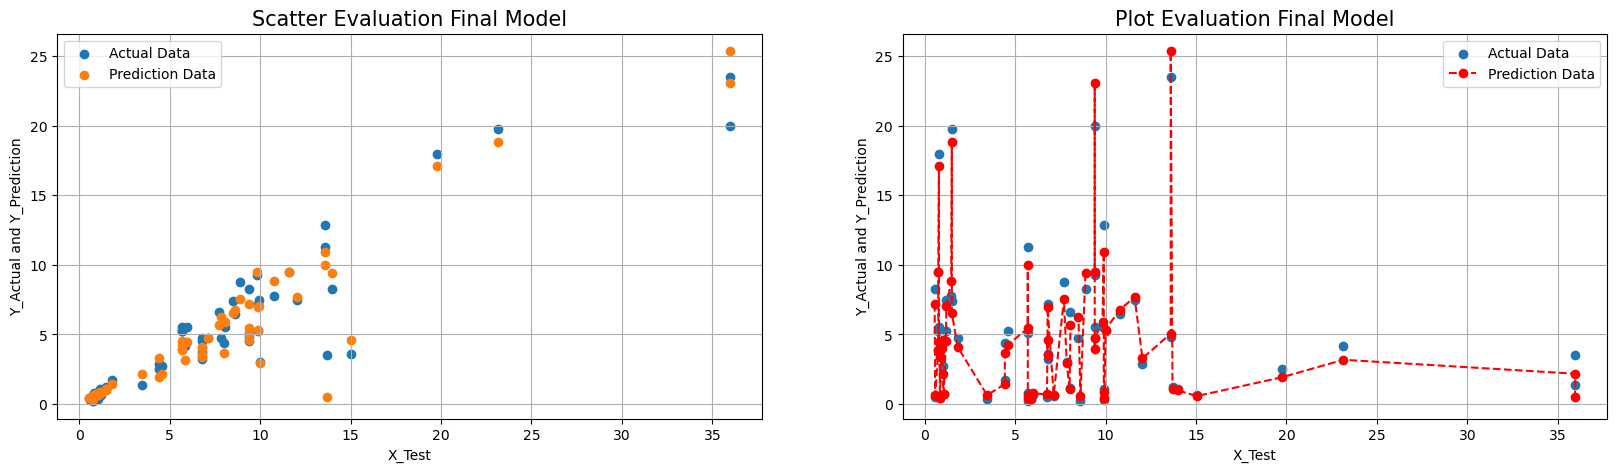

In [161]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.scatter(x_test2.Present_Price, y_test2,  label='Actual Data')
plt.scatter(x_test2.Present_Price, y_pred2, label='Prediction Data')
plt.title('Scatter Evaluation Final Model', fontsize=15)
plt.xlabel("X_Test")
plt.ylabel("Y_Actual and Y_Prediction")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.scatter(Test_Sort.Present_Price, y_test2, label='Actual Data')
plt.plot(Test_Sort.Present_Price, y_pred2, 'r--o', label='Prediction Data')
plt.title('Plot Evaluation Final Model', fontsize=15)
plt.xlabel("X_Test")
plt.ylabel("Y_Actual and Y_Prediction")
plt.legend()
plt.grid()

plt.show()

In [162]:
Df_New = pd.DataFrame({'Selling_Price':[0],
                       'Present_Price':[11.23],
                       'Kms_Driven':[42.000],
                       'Owner':[1],
                       'Age':[10],
                       'Fuel_Type_Diesel':[0],
                       'Fuel_Type_Petrol':[1],
                       'Seller_Type_Individual':[0],
                       'Transmission_Manual':[1],
                       'Present_Price Age':[112.3]})
Df_New                     

Selling_Price  Present_Price  Kms_Driven  Owner  Age  Fuel_Type_Diesel  \
0              0          11.23        42.0      1   10                 0   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  \
0                 1                       0                    1   

   Present_Price Age  
0              112.3

In [163]:
Df_Concat = pd.concat([df_AddFtr, Df_New])
Df_Concat.reset_index(inplace=True)
Df_Concat.drop(columns=['index'], inplace=True)

In [164]:
scale = MinMaxScaler(feature_range=(0, 1))
norm = scale.fit_transform(Df_Concat.iloc[:, 1:10])
norm = pd.DataFrame(norm, columns=[columns for columns in Df_Concat.columns[1:10]])
df_Scale = pd.concat([norm, Df_Concat.iloc[:, 0]], axis=1, sort=True)
df_Scale

Present_Price  Kms_Driven     Owner       Age  Fuel_Type_Diesel  \
0         0.057109    0.053921  0.000000  0.266667               0.0   
1         0.099913    0.085923  0.000000  0.333333               1.0   
2         0.103273    0.013717  0.000000  0.066667               0.0   
3         0.041504    0.010317  0.000000  0.466667               0.0   
4         0.070980    0.084823  0.000000  0.266667               1.0   
..             ...         ...       ...       ...               ...   
297       0.060468    0.119926  0.000000  0.200000               0.0   
298       0.115735    0.175799  0.000000  0.600000               0.0   
299       0.131990    0.017918  0.000000  0.066667               1.0   
300       0.060468    0.010845  0.000000  0.133333               0.0   
301       0.118227    0.000000  0.333333  0.666667               0.0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  \
0                 1.0                     0.0                  1.0   
1                 0.0                     0.0                  1.0   
2                 1.0                     0.0                  1.0   
3                 1.0                     0.0                  1.0   
4                 0.0                     0.0                  1.0   
..                ...                     ...                  ...   
297               1.0                     0.0                  1.0   
298               1.0                     0.0                  1.0   
299               0.0                     0.0                  1.0   
300               1.0                     0.0                  1.0   
301               1.0                     0.0                  1.0   

     Present_Price Age  Selling_Price  
0             0.030184           3.35  
1             0.064390           4.75  
2             0.013296           7.25  
3             0.039214           2.85  
4             0.037095           4.60  
..                 ...            ...  
297           0.023893           4.00  
298           0.133639           3.35  
299           0.016874          11.50  
300           0.015929           5.30  
301           0.151593           0.00  

[302 rows x 10 columns]

In [181]:
Train = df_Scale[:301]
Test = df_Scale.iloc[301:]

In [183]:
x_Train = Train.iloc[:301, :9]
y_Train = Train.Selling_Price.values.reshape(-1, 1)

array([[ 3.35],
       [ 4.75],
       [ 7.25],
       [ 2.85],
       [ 4.6 ],
       [ 9.25],
       [ 6.75],
       [ 6.5 ],
       [ 8.75],
       [ 7.45],
       [ 2.85],
       [ 6.85],
       [ 7.5 ],
       [ 6.1 ],
       [ 2.25],
       [ 7.75],
       [ 7.25],
       [ 7.75],
       [ 3.25],
       [ 2.65],
       [ 2.85],
       [ 4.9 ],
       [ 4.4 ],
       [ 2.5 ],
       [ 2.9 ],
       [ 3.  ],
       [ 4.15],
       [ 6.  ],
       [ 1.95],
       [ 7.45],
       [ 3.1 ],
       [ 2.35],
       [ 4.95],
       [ 6.  ],
       [ 5.5 ],
       [ 2.95],
       [ 4.65],
       [ 0.35],
       [ 3.  ],
       [ 2.25],
       [ 5.85],
       [ 2.55],
       [ 1.95],
       [ 5.5 ],
       [ 1.25],
       [ 7.5 ],
       [ 2.65],
       [ 1.05],
       [ 5.8 ],
       [ 7.75],
       [14.9 ],
       [23.  ],
       [18.  ],
       [16.  ],
       [ 2.75],
       [ 3.6 ],
       [ 4.5 ],
       [ 4.75],
       [ 4.1 ],
       [19.99],
       [ 6.95],
       [ 4.5 ],
       [

In [187]:
x_Test = Test.iloc[:301, :9]
x_Test

Present_Price  Kms_Driven     Owner       Age  Fuel_Type_Diesel  \
301       0.118227         0.0  0.333333  0.666667               0.0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  \
301               1.0                     0.0                  1.0   

     Present_Price Age  
301           0.151593

In [189]:
regressor = LinearRegression() 
regressor.fit(x_Train, y_Train)
y_pred3 = regressor.predict(x_Test)
y_pred3

array([[2.97368425]])